# Orbitals and densities

We here focus on the visualization of molecular orbitals and radial densities.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import py3Dmol
import veloxchem as vlx
import multipsi as mtp

[thomas-Latitude-5580:86915] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 4.


## Molecular orbitals

(sec:orbview)=
### Using OrbitalViewer

Considering thymine with a minimal basis set, the SCF is optimized in order to provide the canonical orbitals.

In [4]:
thymine_xyz = """15
*
 C     0.095722    -0.037785    -1.093615
 C    -0.011848     1.408694    -1.113404
 C    -0.204706     2.048475     0.052807
 N    -0.302595     1.390520     1.249226
 C    -0.214596     0.023933     1.378238
 N    -0.017387    -0.607231     0.171757
 O     0.270287    -0.735594    -2.076393
 C     0.098029     2.096194    -2.424990
 H     1.052976     1.874860    -2.891573
 H     0.002157     3.170639    -2.310554
 H    -0.671531     1.743694    -3.104794
 O    -0.301905    -0.554734     2.440234
 H    -0.292790     3.119685     0.106201
 H     0.053626    -1.612452     0.215637
 H    -0.446827     1.892203     2.107092
"""

# Create veloxchem mol and basis objects
molecule = vlx.Molecule.read_xyz_string(thymine_xyz)
basis = vlx.MolecularBasis.read(molecule, "sto-3g", ostream=None)

# Perform SCF calculation
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()
scf_results = scf_drv.compute(molecule, basis)

In [5]:
molecule.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

The resulting MOs can then be illustrated interactively with `OrbitalViewer`, which is available through the `VeloxChem` package:


In [6]:
viewer = vlx.OrbitalViewer()
viewer.plot(molecule, basis, scf_drv.mol_orbs)

Output()

Dropdown(description='Orbital:', index=32, options=(('  1 occ=2.000 ene=-20.231', 0), ('  2 occ=2.000 ene=-20.…

```{note}
As this is an interactive viewer, it will not be able to change the MO to visualize in the compiled html-book. It will work in a notebook, though.
```

These routines are also available in the `MultiPsi` package, where additional functionalities for selecting and saving an active space are available:

In [7]:
viewer = mtp.OrbitalViewer()
viewer.plot(molecule, basis, scf_drv.mol_orbs)

Output()

Dropdown(description='Orbital:', index=32, options=(('  1 occ=2.000 ene=-20.231', 0), ('  2 occ=2.000 ene=-20.…

Checkbox(value=False, description='Active')

Output()

### Using cube-files

Volumetric data can be constructed and saved using the `VisualizationDriver`, which can then be illustrated with `py3Dmol`. The file sizes can be quite substantial, and we thus recommend using more light-weight modules whenever possible.

The HOMO, LUMO, and $\alpha$ densities of water are constructed and saved as cube-files using:

```python
water_mol_str = """
O       0.0000000000     0.0000000000     0.1178336003
H      -0.7595754146    -0.0000000000    -0.4713344012
H       0.7595754146     0.0000000000    -0.4713344012
"""

molecule = vlx.Molecule.read_molecule_string(water_mol_str)
basis = vlx.MolecularBasis.read(molecule, "6-31G", ostream=None)
vis_drv = vlx.VisualizationDriver()
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()

vis_drv.gen_cubes(
    cube_dict={
        "cubes": "mo(homo),mo(lumo),density(alpha)",
        "files": "../../img/visualize/water_HOMO.cube,../../img/visualize/water_LUMO.cube,../../img/visualize/water_a_density.cube",
    },
    molecule=molecule,
    basis=basis,
    mol_orbs=scf_drv.mol_orbs,
    density=scf_drv.density,
)
```

Overlaying the densities on stick structures, we obtain below results.

```{note}
Below figure is a static snapshot (in order to save server space and compilation time), and can thus not be manipulated interactively.
```

```python
viewer = py3Dmol.view(linked=False, viewergrid=(1, 3), width=800, height=300)

# HOMO
with open("../../img/vis/water_HOMO.cube", "r") as f:
    cube = f.read()
# Plot strick structures
viewer.addModel(cube, "cube", viewer=(0, 0))
viewer.setStyle({"stick": {}}, viewer=(0, 0))
# Negative and positive nodes
viewer.addVolumetricData(
    cube, "cube", {"isoval": -0.02, "color": "blue", "opacity": 0.75}, viewer=(0, 0)
)
viewer.addVolumetricData(
    cube, "cube", {"isoval": 0.02, "color": "red", "opacity": 0.75}, viewer=(0, 0)
)
viewer.rotate(-45, "x", viewer=(0, 0))

# LUMO
with open("../../img/vis/water_LUMO.cube", "r") as f:
    cube = f.read()
viewer.addModel(cube, "cube", viewer=(0, 1))
viewer.setStyle({"stick": {}}, viewer=(0, 1))
viewer.addVolumetricData(
    cube, "cube", {"isoval": -0.02, "color": "blue", "opacity": 0.75}, viewer=(0, 1)
)
viewer.addVolumetricData(
    cube, "cube", {"isoval": 0.02, "color": "red", "opacity": 0.75}, viewer=(0, 1)
)
viewer.rotate(-45, "x", viewer=(0, 1))

# Alpha density
with open("../../img/vis/water_a_density.cube", "r") as f:
    cube = f.read()
viewer.addModel(cube, "cube", viewer=(0, 2))
viewer.setStyle({"stick": {}}, viewer=(0, 2))
viewer.addVolumetricData(
    cube, "cube", {"isoval": 0.02, "color": "red", "opacity": 0.75}, viewer=(0, 2)
)
viewer.rotate(-45, "x", viewer=(0, 2))

viewer.show()
```

![HOMO, LUMO and density of water](../../img/visualize/water-homo-lumo-dens.png)

## Radial distribution

In order to illustrate radial distributions, we consider the neon atom with a double-zeta basis set:

In [8]:
mol_str = """
Ne        0.00000000    0.00000000    0.00000000
"""
molecule = vlx.Molecule.read_molecule_string(mol_str)
basis = vlx.MolecularBasis.read(molecule, "cc-pVDZ", ostream=None)

scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()
scf_results = scf_drv.compute(molecule, basis)

### Valence orbitals

Considering the occupied MOs along the z-axis:

In [9]:
vis_drv = vlx.VisualizationDriver()

mol_orbs = scf_drv.mol_orbs
# define the coordinates (in Bohr) for which you wish values of orbitals
n = 100
coords = np.zeros((n, 3))
r = np.linspace(0, 2, n)
coords[:, 2] = r  # radial points along the z-axis

# get the values of orbitals
mo_alpha = mol_orbs.alpha_to_numpy()
mo_1s = np.array(vis_drv.get_mo(coords, molecule, basis, mo_alpha, 0))
mo_2s = np.array(vis_drv.get_mo(coords, molecule, basis, mo_alpha, 1))
mo_2p_1 = np.array(vis_drv.get_mo(coords, molecule, basis, mo_alpha, 2))
mo_2p_2 = np.array(vis_drv.get_mo(coords, molecule, basis, mo_alpha, 3))
mo_2p_3 = np.array(vis_drv.get_mo(coords, molecule, basis, mo_alpha, 4))

# adjust signs
mo_1s = np.sign(mo_1s[10]) * mo_1s
mo_2s = np.sign(mo_2s[10]) * mo_2s
mo_2p_1 = np.sign(mo_2p_1[10]) * mo_2p_1
mo_2p_2 = np.sign(mo_2p_2[10]) * mo_2p_2
mo_2p_3 = np.sign(mo_2p_3[10]) * mo_2p_3

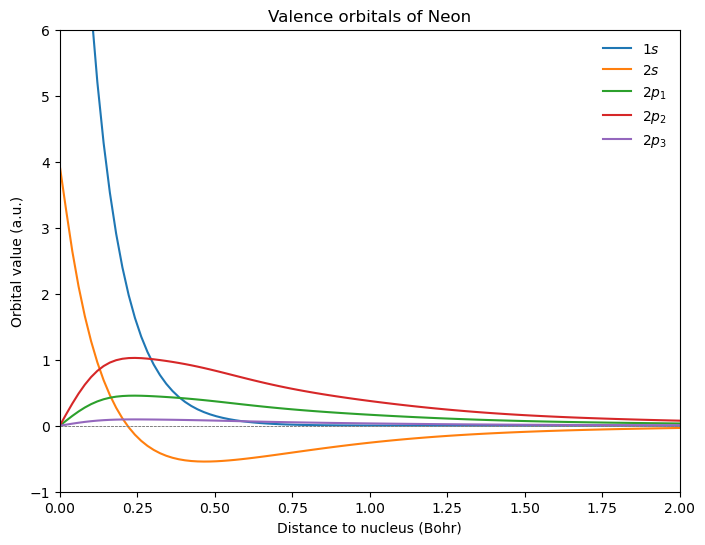

In [10]:
fig = plt.figure(1, figsize=(8, 6))

plt.plot(r, mo_1s, r, mo_2s, r, mo_2p_1, r, mo_2p_2, r, mo_2p_3)

plt.axhline(y=0.0, color="0.5", linewidth=0.7, dashes=[3, 1, 3, 1])
plt.setp(plt.gca(), xlim=(0, 2), ylim=(-1, 6))
plt.legend(
    [r"$1s$", r"$2s$", r"$2p_1$", r"$2p_2$", r"$2p_3$"],
    loc="upper right",
    frameon=False,
)

plt.title(r"Valence orbitals of Neon")
plt.xlabel(r"Distance to nucleus (Bohr)")
plt.ylabel(r"Orbital value (a.u.)")

plt.show()

### Atomic sub-shell densities

Looking at the densities of different sub-shells, we obtain:

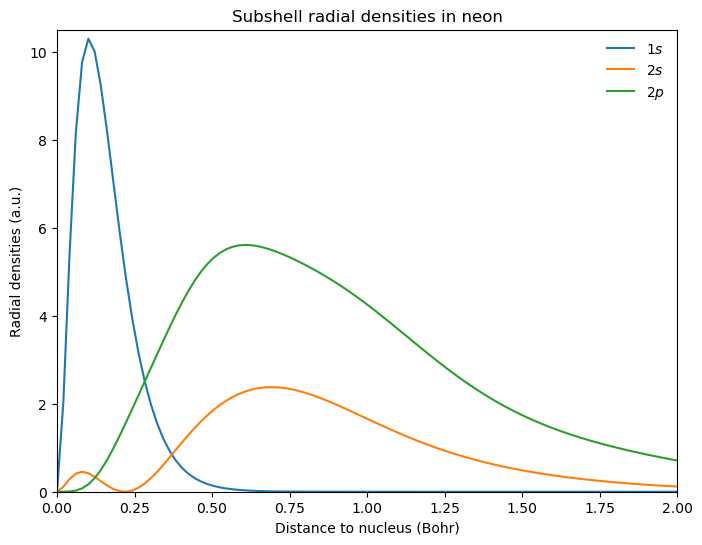

In [11]:
fig = plt.figure(2, figsize=(8, 6))

# additional factor of 2 from alpha and beta spin orbitals
rad_den_1s = 4 * np.pi * r ** 2 * 2 * mo_1s ** 2
rad_den_2s = 4 * np.pi * r ** 2 * 2 * mo_2s ** 2
rad_den_2p = 4 * np.pi * r ** 2 * 2 * (mo_2p_1 ** 2 + mo_2p_2 ** 2 + mo_2p_3 ** 2)

plt.plot(r, rad_den_1s, r, rad_den_2s, r, rad_den_2p)

plt.axhline(y=0.0, color="0.5", linewidth=0.7, dashes=[3, 1, 3, 1])
plt.setp(plt.gca(), xlim=(0, 2), ylim=(0.0, 10.5))
plt.legend([r"$1s$", r"$2s$", r"$2p$"], loc="upper right", frameon=False)

plt.title(r"Subshell radial densities in neon")
plt.xlabel(r"Distance to nucleus (Bohr)")
plt.ylabel(r"Radial densities (a.u.)")

plt.show()